1) Write a function (ideally in Python – but you can also use any other language) that generates an undirected growing network based on the K Nearest-Neighbors (KNN) rule, as follows:

–Start with a clique of n0 nodes that are randomly located in the Cartesian square S=[0,1]×[0,1].

–Grow the network by adding one node in each iteration.  The new node must be located at a randomly chosen location within S,  and it should be connected to its K nearest neighbors.

Use G=KNN model (n0, K, N) as the interface of your function, where N is the number of iterations and G is the final network.

In [91]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from collections import Counter
%matplotlib inline

In [76]:
def make_xy_clique_add_nodes_iter(N, n0, K):
    """
    This function makes a clique of n0 nodes, iteratively adds N number of nodes 1 at a time, and connects them to their
    K-nearest neighbors. All nodes are added randomly in the xy-plane ranging from 0 to 1.
    """
    
    # Make the clique of n0 nodes
    graph = nx.complete_graph(n0)
    num_nodes = nx.number_of_nodes(graph)
    for node_num in range(num_nodes):
        graph.node[node_num]['x'] = np.random.random_sample()
        graph.node[node_num]['y'] = np.random.random_sample()
        node_num +=1
        
    # Initialize a list of xy coordinates of the nodes, this will be updated as new nodes are added
    x_coord = list(nx.get_node_attributes(graph,'x').values())
    y_coord = list(nx.get_node_attributes(graph,'y').values())
    xy_coords = []
    for x,y in zip(x_coord, y_coord): 
        xy_coords.append([x, y])
    
    # Adds the new nodes 1 at a time, adds thie coords to xy_coords list, 
    # and connects them to their K-nearest neighbors
    # If K is larger than the number of nodes in graph, then new node is connected to all nodes
    new_node_num = n0 + N
    for node_num in range(n0, new_node_num):
        graph.add_node(node_num)
        graph.node[node_num]['x'] = np.random.random_sample()
        graph.node[node_num]['y'] = np.random.random_sample()
        xy_coords.append([graph.node[node_num]['x'], graph.node[node_num]['y']])
        if node_num < K: 
            num_nbrs = node_num    
        else: 
            num_nbrs = K
        nbrs = NearestNeighbors(n_neighbors=num_nbrs+1).fit(xy_coords)
        distances, indices = nbrs.kneighbors(xy_coords)
        for nbr in range(1, num_nbrs+1):
            nrst_nbr = indices[node_num][nbr]
            graph.add_edge(node_num, nrst_nbr)
    
    return graph

1000 loops, best of 3: 801 µs per loop


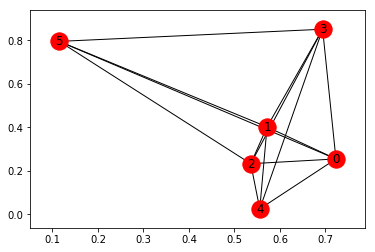

In [80]:
# Test the function
%time example = make_xy_clique_add_nodes_iter(3,3,4)
xy_coords = []
for x,y in zip(
               list(nx.get_node_attributes(example,'x').values()), 
               list(nx.get_node_attributes(example,'y').values())
               ): 
    xy_coords.append([x, y])
nx.draw_networkx(example, xy_coords)

2) Using your KNN model function, construct networks with N=10000, n0=4 and K=4. Does this model generate scale-free networks?  Does it generate small-world networks?  Justify your answer with the appropriate graphs.

In [112]:
%time prob2 = make_xy_clique_add_nodes_iter(10000,4,4)

CPU times: user 2min 48s, sys: 0 ns, total: 2min 48s
Wall time: 2min 48s


In [115]:
prob2_degree = prob2.degree()
prob2_degree_count = Counter(prob2_degree.values())

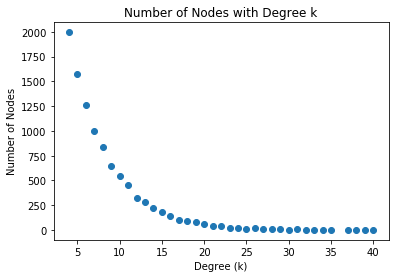

In [134]:
plt.scatter(prob2_degree_count.keys(), prob2_degree_count.values())
plt.title('Number of Nodes with Degree k')
plt.xlabel('Degree (k)')
plt.ylabel('Number of Nodes')

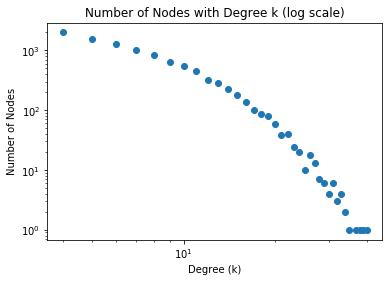

In [133]:
plt.scatter(prob2_degree_count.keys(), prob2_degree_count.values())
plt.title('Number of Nodes with Degree k (log scale)')
plt.xlabel('Degree (k)')
plt.ylabel('Number of Nodes')
plt.xscale('log')
plt.yscale('log')